# CUREYA TASK 4

HOUSE PRICE PREDICTION

In [2]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
#Importing Dataset
df = pd.read_csv('data.csv')

In [4]:
df.shape

(4600, 18)

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [9]:
#Checking the null values in dataset
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

# Data Visualization

EXPLORATORY DATA ANALYSIS

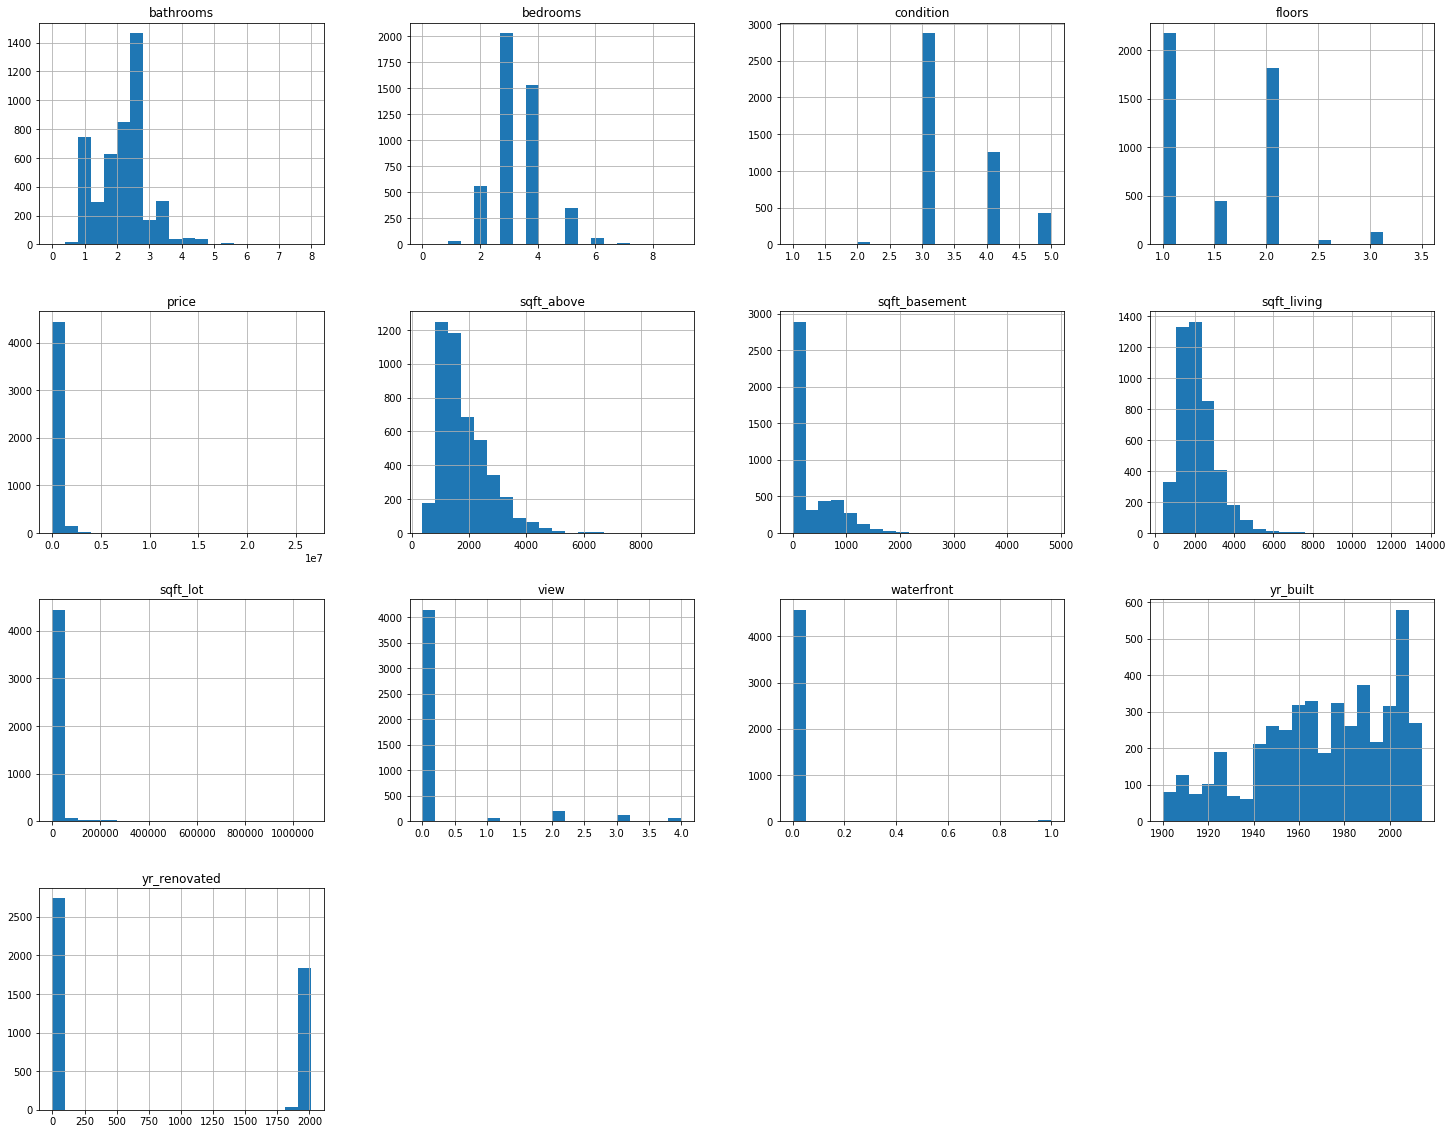

In [10]:
#Data distribution of all the numeric variables
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(25,20))
plt.show()

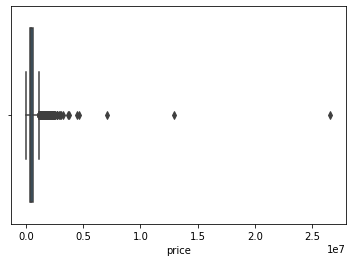

In [11]:
sns.boxplot(x='price', data= df)

In [12]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


CORRELATION MATRIX

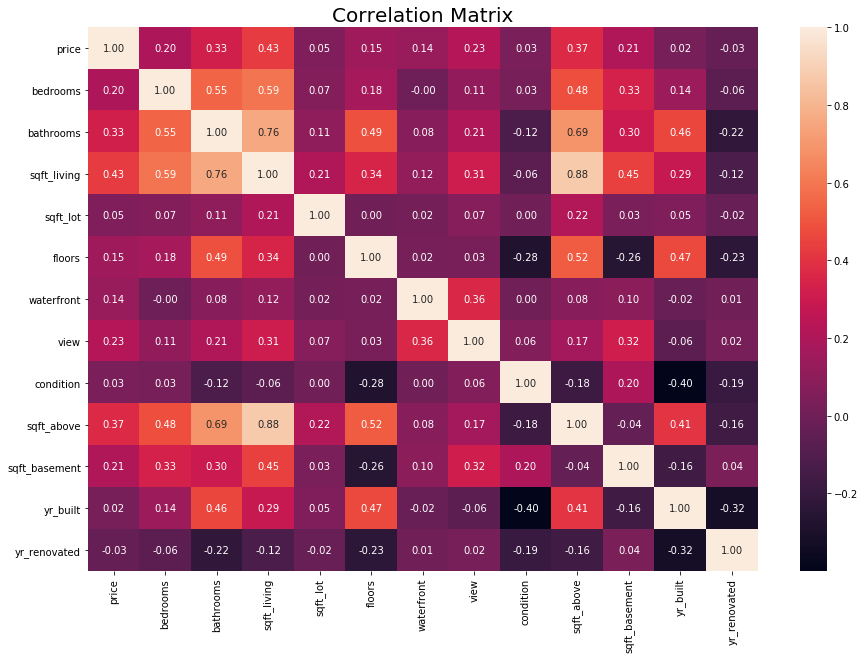

In [13]:
#Correlation matrix of the dataset
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
ax.set_title("Correlation Matrix", fontsize=20) 
plt.show()

# Machine Learning Models 

In [14]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
y = df['price']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Trainind and testing of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression 
lm = LinearRegression() 
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(lm.intercept_)

5399305.140280416


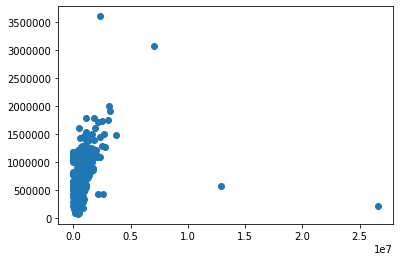

In [19]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

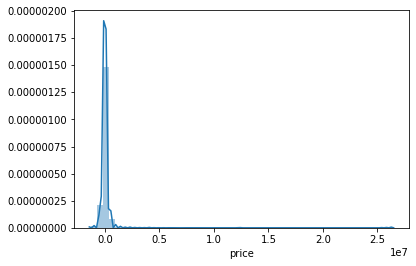

In [20]:
sns.distplot((y_test-predictions),bins=50)

In [21]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
reg = LinearRegression()

In [47]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
reg.score(X_test,y_test)

0.10476959745034542

In [49]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [50]:
clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=400,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [51]:
clf.score(X_test,y_test)

0.07491160767167726

In [58]:
#RANDOM FOREST REGRESSION
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation: ')
print(y_test, test_pred)
print('\nTrain set evaluation: ')
print(y_train, train_pred)

Test set evaluation: 
4032    1360000.0
1558     332000.0
2004     343000.0
3186     660000.0
4176     310000.0
          ...    
1105     220000.0
3797     535000.0
166      425000.0
154      609000.0
1196     622500.0
Name: price, Length: 1840, dtype: float64 [1375458.145       475076.25790476  356429.42442857 ...  441729.03585348
  482516.38274532  638554.37947222]

Train set evaluation: 
695     707000.0
1170    555000.0
684     267800.0
2490    129000.0
2882    549000.0
          ...   
4079    513000.0
4171    749950.0
599     450000.0
1361    283200.0
1547    550000.0
Name: price, Length: 2760, dtype: float64 [750751.24962069 535931.72179762 266396.98621118 ... 480966.72557609
 319343.18642856 626660.01028571]


In [57]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation: ')
print(y_test, test_pred)
print('\nTrain set evaluation: ')
print(y_train, train_pred)

Test set evaluation: 
4032    1360000.0
1558     332000.0
2004     343000.0
3186     660000.0
4176     310000.0
          ...    
1105     220000.0
3797     535000.0
166      425000.0
154      609000.0
1196     622500.0
Name: price, Length: 1840, dtype: float64 [1391210.82292399  525387.10451206  445848.7072728  ...  355051.93817089
  490247.75591349  702295.06923152]

Train set evaluation: 
695     707000.0
1170    555000.0
684     267800.0
2490    129000.0
2882    549000.0
          ...   
4079    513000.0
4171    749950.0
599     450000.0
1361    283200.0
1547    550000.0
Name: price, Length: 2760, dtype: float64 [787819.29989236 514263.8382342  220788.9332002  ... 602130.26906932
 419840.8418568  695725.15757281]


In [59]:
# LASSO REGRESSION
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation: ')
print(y_test, test_pred)
print('\nTrain set evaluation: ')
print(y_train, train_pred)

Test set evaluation: 
4032    1360000.0
1558     332000.0
2004     343000.0
3186     660000.0
4176     310000.0
          ...    
1105     220000.0
3797     535000.0
166      425000.0
154      609000.0
1196     622500.0
Name: price, Length: 1840, dtype: float64 [1363093.1137011   534772.16246687  548537.20485388 ...  430901.27224793
  513624.49285387  713112.3109121 ]

Train set evaluation: 
695     707000.0
1170    555000.0
684     267800.0
2490    129000.0
2882    549000.0
          ...   
4079    513000.0
4171    749950.0
599     450000.0
1361    283200.0
1547    550000.0
Name: price, Length: 2760, dtype: float64 [820129.05353557 560684.05933548 226339.62173257 ... 647351.91226946
 527386.68920434 634859.15043455]
